In [ ]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import openpyxl
import csv
import matplotlib
import scipy.stats as sp
import xgboost as xgb
import pickle
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scrublet as scr

In [9]:
N_LP_LGN=sc.read_h5ad('G:/single cell data 2025.02.18/LP_LGN/N_LP_LGN_Class.h5ad')
D_LP_LGN=sc.read_h5ad('G:/single cell data 2025.02.18/LP_LGN/D_LP_LGN_Class.h5ad')

In [10]:
N_LP_LGN

AnnData object with n_obs × n_vars = 51924 × 19679
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample', 'tissue', 'leiden', 'presubclass', 'preclass', 'leiden_res_0.20', 'leiden_res_0.30', 'leiden_res_0.40', 'leiden_res_0.50', 'leiden_use', 'cluster_use', 'cluster', 'leiden_res_1.00', 'batch', 'subclass', 'leiden_res_0.60', 'Class'
    var: 'gene_ids', 'feature_types', 'n_cells-N1_LGN-LGN', 'n_cells-N2_LGN-LGN', 'n_cells-N1_LP-LP', 'n_cells-N2_LP-LP', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

In [14]:
sc.tl.pca(N_LP_LGN,svd_solver='arpack')
sc.pp.neighbors(N_LP_LGN,n_neighbors=25,use_rep='X_pca')
sc.tl.leiden(N_LP_LGN,resolution=1.5)
sc.tl.umap(N_LP_LGN)
N_LP_LGN.write_h5ad('G:/single cell data 2025.02.18/LP_LGN/N_LP_LGN_cluster_use_pca.h5ad')

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


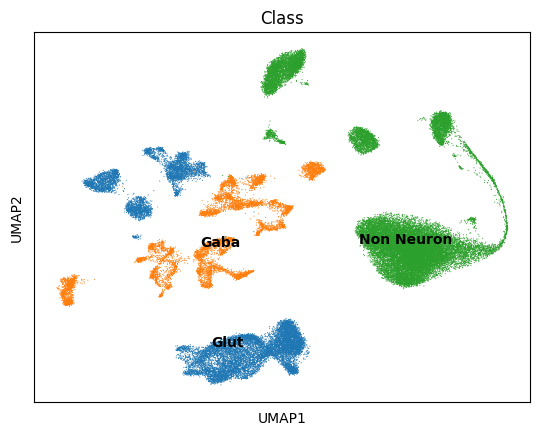

In [15]:
sc.pl.umap(N_LP_LGN, color='Class',legend_loc='on data',save='N_LP_LGN_Class.pdf')

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


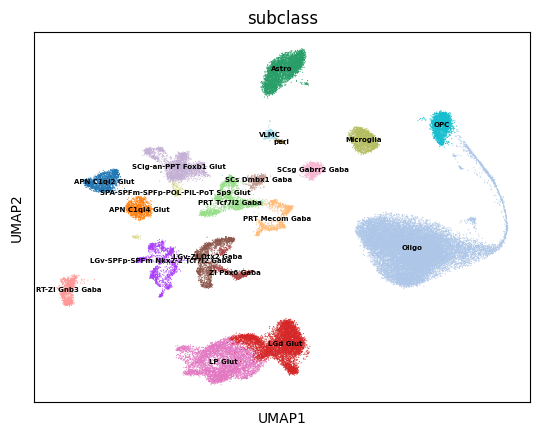

In [16]:
sc.pl.umap(N_LP_LGN, color='subclass',legend_loc='on data',legend_fontsize='5',save='N_LP_LGN_subclass.pdf')

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


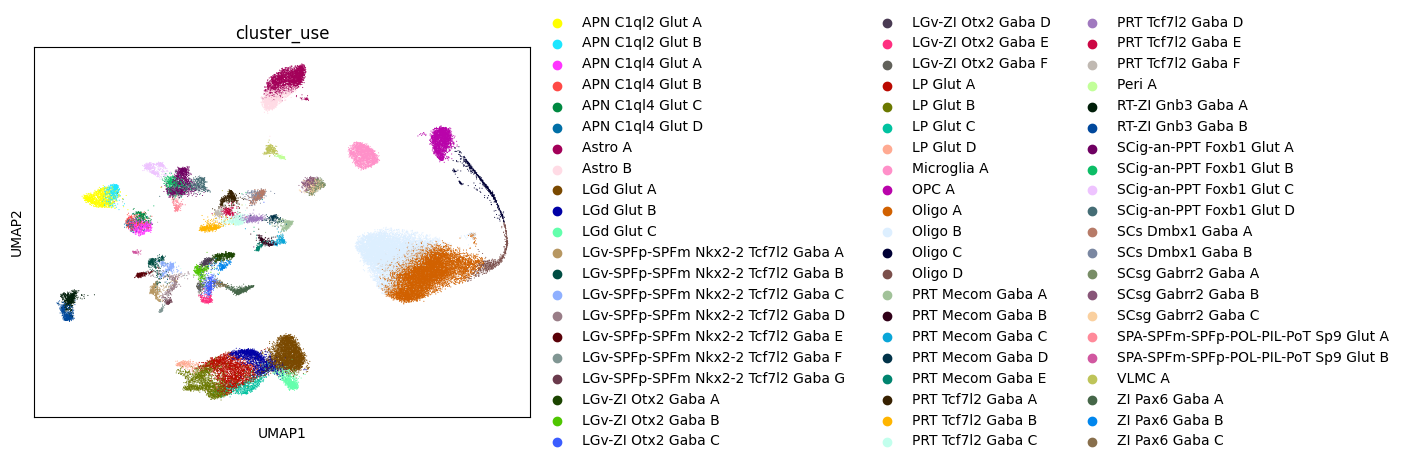

In [17]:
sc.pl.umap(N_LP_LGN, color='cluster_use',save='N_LP_LGN_cluster_use.pdf')

In [18]:
sc.tl.pca(D_LP_LGN,svd_solver='arpack')
sc.pp.neighbors(D_LP_LGN,n_neighbors=25,use_rep='X_pca')
sc.tl.leiden(D_LP_LGN,resolution=1.5)
sc.tl.umap(D_LP_LGN)
D_LP_LGN.write_h5ad('G:/single cell data 2025.02.18/LP_LGN/D_LP_LGN_cluster_use_pca.h5ad')

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


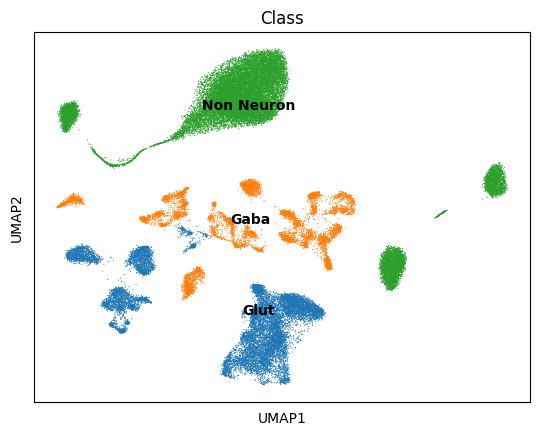

In [19]:
sc.pl.umap(D_LP_LGN, color='Class',legend_loc='on data',save='D_LP_LGN_Class.pdf')

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


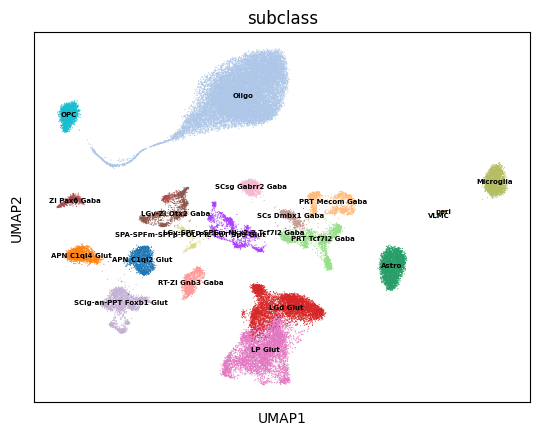

In [20]:
sc.pl.umap(D_LP_LGN, color='subclass',legend_loc='on data',legend_fontsize='5',save='D_LP_LGN_subclass.pdf')

E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


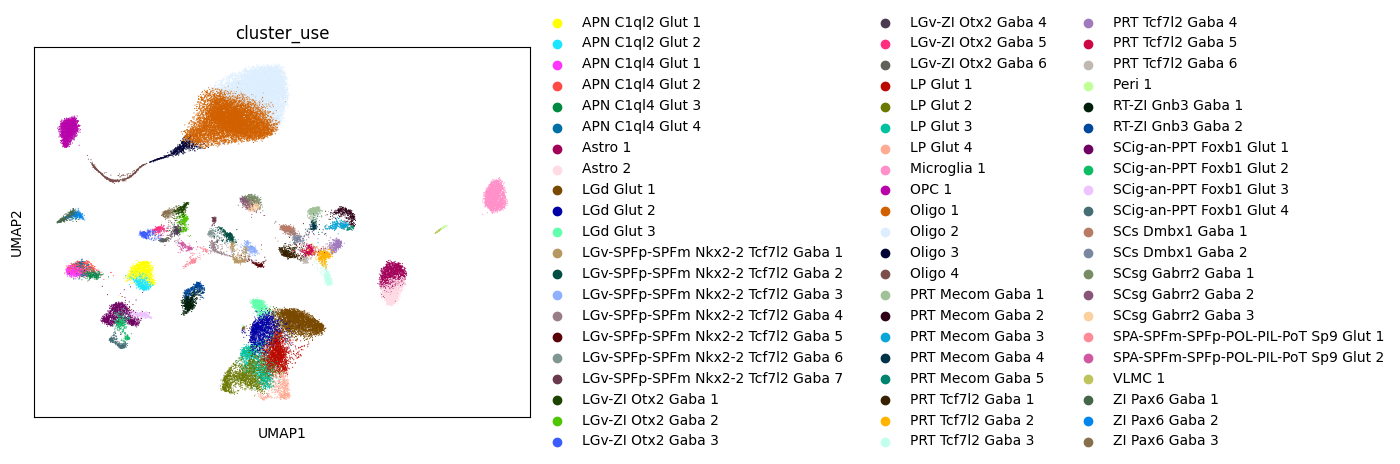

In [21]:
sc.pl.umap(D_LP_LGN, color='cluster_use',save='D_LP_LGN_cluster_use.pdf')